In [2]:
from sklearn.neural_network import MLPClassifier
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import math





Using TensorFlow backend.


In [8]:
path = "."
#path = "/Users/Chloe/Desktop/AI MSc/Intro to AI/Coursework"
filename_read = os.path.join(path, "All_patients_correct_circadian.csv")
PAL = pd.read_csv(filename_read)

In [9]:
PAL

,time,x,y,z,heartbeat,label,circadian
0,0.0,-0.234650,0.905975,0.362747,87.0,-1,1.000000
1,30.0,-0.301010,0.805710,0.487167,95.0,-1,0.999998
2,60.0,-0.323517,0.923447,0.146362,84.0,-1,0.999990
3,90.0,-0.509674,0.855102,-0.049118,85.0,-1,0.999979
4,120.0,-0.387756,0.919067,0.023758,82.0,-1,0.999962
...,...,...,...,...,...,...,...
25776,21450.0,-0.397858,-0.000671,-0.914093,69.0,0,0.010908
25777,21480.0,-0.258469,0.257599,-0.921783,78.0,0,0.008727
25778,21510.0,-0.259415,0.253677,-0.925705,69.0,0,0.006545
25779,21540.0,-0.259415,0.256119,-0.925232,68.0,0,0.004363


In [10]:
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

All patients shuffled
           time         x         y         z  heartbeat  label  circadian
15149  16740.0  0.497498 -0.623047 -0.598938       66.0      5   0.346117
11840  19200.0 -0.868256 -0.136993 -0.463547       54.0      2   0.173648
269     8070.0  0.446732 -0.127426 -0.885483       86.0      3   0.832680
8779   13080.0  0.516769 -0.812744  0.250076       57.0      2   0.580703
22313   3600.0 -0.573257  0.205811 -0.788651       66.0      2   0.965926
Patients data size (25781, 7)


In [11]:


min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])




Patients data normalized heartbeat
           time         x         y         z  heartbeat  label  circadian
15149  16740.0  0.497498 -0.623047 -0.598938   0.280899      5   0.346117
11840  19200.0 -0.868256 -0.136993 -0.463547   0.146067      2   0.173648
269     8070.0  0.446732 -0.127426 -0.885483   0.505618      3   0.832680
8779   13080.0  0.516769 -0.812744  0.250076   0.179775      2   0.580703
22313   3600.0 -0.573257  0.205811 -0.788651   0.280899      2   0.965926
X data 
 [[ 0.4974976  -0.6230469  -0.598938    0.28089888  0.34611706]
 [-0.8682556  -0.1369934  -0.4635468   0.14606742  0.17364818]
 [ 0.4467316  -0.1274261  -0.8854828   0.50561798  0.8326797 ]
 [ 0.5167694  -0.8127441   0.2500763   0.17977528  0.58070296]
 [-0.5732574   0.2058105  -0.7886505   0.28089888  0.96592583]]


In [12]:
y[y == -1] = 6
one_hot = np.identity(7)

labels_one_hot = []
for i in range(y.shape[0]):
    labels_one_hot.append(one_hot[y[i]])
    
print("labels one hot\n",labels_one_hot[0:5])

labels one hot
 [array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.])]


262
Training set loss: 0.433414


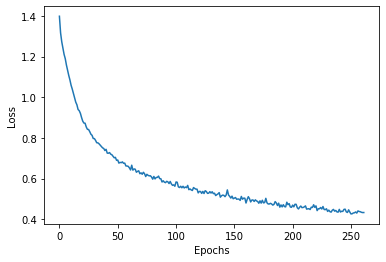

Fold #1, Training Size: 69657, Validation Size: 5157
              precision    recall  f1-score   support

           0       0.71      0.48      0.57       412
           1       0.39      0.25      0.31       352
           2       0.78      0.93      0.85      2487
           3       0.92      0.65      0.76       641
           4       0.77      0.99      0.86        68
           5       0.87      0.85      0.86      1112
           6       0.75      0.60      0.67        85

    accuracy                           0.79      5157
   macro avg       0.74      0.68      0.70      5157
weighted avg       0.78      0.79      0.78      5157

Accuracy: 0.79
199
Training set loss: 0.444849


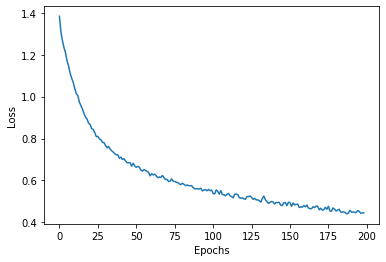

Fold #2, Training Size: 70007, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.74      0.43      0.54       446
           1       0.38      0.18      0.24       350
           2       0.76      0.91      0.83      2437
           3       0.77      0.85      0.81       660
           4       0.85      0.74      0.79        68
           5       0.89      0.77      0.82      1106
           6       0.65      0.44      0.52        89

    accuracy                           0.77      5156
   macro avg       0.72      0.62      0.65      5156
weighted avg       0.76      0.77      0.75      5156

Accuracy: 0.77
213
Training set loss: 0.452628


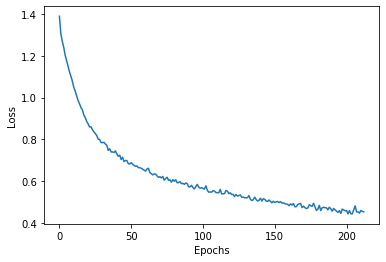

Fold #3, Training Size: 69594, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       421
           1       0.37      0.19      0.25       351
           2       0.82      0.87      0.84      2496
           3       0.81      0.84      0.82       625
           4       0.85      0.90      0.88        70
           5       0.82      0.92      0.87      1114
           6       0.63      0.51      0.56        79

    accuracy                           0.80      5156
   macro avg       0.72      0.68      0.69      5156
weighted avg       0.78      0.80      0.78      5156

Accuracy: 0.80
221
Training set loss: 0.460899


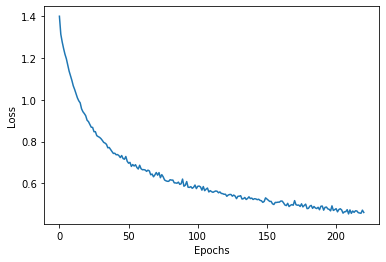

Fold #4, Training Size: 69237, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.64      0.53      0.58       448
           1       0.37      0.23      0.28       324
           2       0.84      0.88      0.86      2547
           3       0.86      0.80      0.83       617
           4       0.83      0.89      0.86        75
           5       0.83      0.89      0.86      1059
           6       0.61      0.77      0.68        86

    accuracy                           0.80      5156
   macro avg       0.71      0.71      0.71      5156
weighted avg       0.79      0.80      0.79      5156

Accuracy: 0.80
210
Training set loss: 0.441484


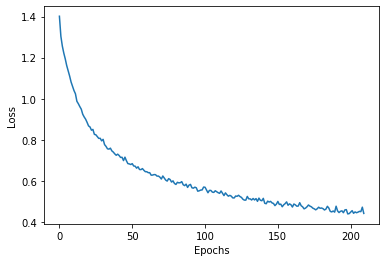

Fold #5, Training Size: 69769, Validation Size: 5156
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       422
           1       0.45      0.14      0.22       367
           2       0.86      0.81      0.83      2471
           3       0.72      0.93      0.81       642
           4       0.86      0.81      0.84        75
           5       0.75      0.95      0.84      1105
           6       0.60      0.73      0.66        74

    accuracy                           0.78      5156
   macro avg       0.69      0.69      0.67      5156
weighted avg       0.76      0.78      0.76      5156

Accuracy: 0.78


In [9]:
kf = KFold(5)

mlp = MLPClassifier(activation = 'relu',alpha = 0.00001,hidden_layer_sizes=(600,500,100), max_iter=1000,solver = 'adam')    
#mlp.output_activation = 'softmax'

fold = 1
# The data is split five ways, for each fold, the 
# Perceptron is trained, tested and evaluated for accuracy
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    mlp.fit(X[train_index],y[train_index])
    
    #pd.DataFrame(mlp.loss_curve_).plot()
    print(len(mlp.loss_curve_))
    
    plt.plot(range(0,len(mlp.loss_curve_)),mlp.loss_curve_)
    #plt.show()
    #print(mlp.loss_curve_) 
    print("Training set loss: %f" % mlp.loss_)
    #loss_values = mlp.loss_
    #print(loss_values)
    #print("Training set loss: %f" % mlp.loss_)
    '''epochs = range(1, len(loss_values)+1)
    plt.plot(epochs, loss_values, label='Training Loss')
    '''
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()
    
    y_pred = mlp.predict(X[test_index])
    #print(y_test)
    #print(y_pred)
    print(f"Fold #{fold}, Training Size: {len(X_train)}, Validation Size: {len(X_test)}")
    print(classification_report(y_test,y_pred)) 
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    
    
    

    
    
    
    fold += 1



i started


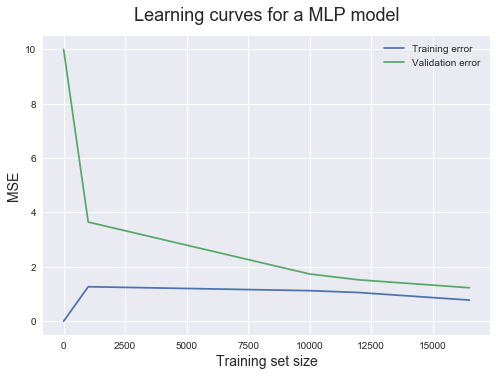

In [10]:
kf = KFold(5)
train_sizes = [1,1000,10000,12000,16499]
#train_scores_mean = -train_scores.mean(axis = 1)

print('i started')
train_sizes, train_scores, validation_scores = learning_curve(
estimator = MLPClassifier(activation = 'relu',alpha = 0.00001,hidden_layer_sizes=(600,500,100), max_iter=1000,solver = 'adam'), 
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,scoring = 'neg_mean_squared_error', shuffle = True)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a MLP model', fontsize = 18, y = 1.03)
plt.legend()



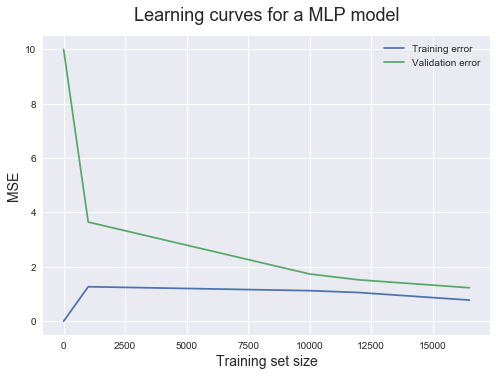

In [11]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a MLP model', fontsize = 18, y = 1.03)
plt.savefig("MLP_circadian_MSE.png")
plt.legend()
